### Importação dos dados



In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
urls = {
    'Loja 1': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    'Loja 2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    'Loja 3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    'Loja 4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
}

lojas = []
for nome, url in urls.items():
    df = pd.read_csv(url)
    df = df.rename(columns={'Local da compra': 'Local da Compra'})
    df['Loja'] = nome
    lojas.append(df)

df_total = pd.concat(lojas, ignore_index=True)

#1. Análise do faturamento


In [11]:
faturamento = df_total.groupby('Loja')['Preço'].sum().reset_index(name='Faturamento Total')
faturamento_total_geral = faturamento['Faturamento Total'].sum()
faturamento['% do Faturamento Total'] = faturamento['Faturamento Total'] / faturamento_total_geral * 100

# Local de compra mais comum
locais_comuns = df_total.groupby('Loja')['Local da Compra'].agg(lambda x: x.mode()[0]).reset_index(name='Local de Compra Mais Comum')

# Tabela final de faturamento
tabela_faturamento = faturamento.merge(locais_comuns, on='Loja')
tabela_faturamento['Faturamento Total'] = tabela_faturamento['Faturamento Total'].apply(
    lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
)
tabela_faturamento['% do Faturamento Total'] = tabela_faturamento['% do Faturamento Total'].map(lambda x: f"{x:.2f}%".replace(".", ","))

print("📊 Análise de Faturamento por Loja:")
tabela_faturamento


📊 Análise de Faturamento por Loja:


,Loja,Faturamento Total,% do Faturamento Total,Local de Compra Mais Comum
0,Loja 1,"R$ 1.534.509,12","26,13%",SP
1,Loja 2,"R$ 1.488.459,06","25,35%",SP
2,Loja 3,"R$ 1.464.025,03","24,93%",SP
3,Loja 4,"R$ 1.384.497,58","23,58%",SP


# 2. Vendas por Categoria


In [12]:
vendas_cat = df_total.groupby('Categoria do Produto')['Preço'].sum().reset_index()
vendas_cat_qtd = df_total.groupby('Categoria do Produto')['Preço'].count().reset_index(name='Quantidade de Vendas')

# Receita total
receita_total = vendas_cat['Preço'].sum()
vendas_cat['% da Receita Total'] = vendas_cat['Preço'] / receita_total * 100

# Linha total
linha_total = pd.DataFrame([{
    'Categoria do Produto': 'Total',
    'Preço': receita_total,
    '% da Receita Total': vendas_cat['% da Receita Total'].sum()
}])

vendas_cat = pd.concat([vendas_cat, linha_total], ignore_index=True)
vendas_cat['Preço'] = vendas_cat['Preço'].apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
vendas_cat['% da Receita Total'] = vendas_cat['% da Receita Total'].map(lambda x: f"{x:.2f}%".replace(".", ","))

# Merge com quantidade de vendas
vendas_cat = vendas_cat.merge(vendas_cat_qtd, on='Categoria do Produto', how='left')
vendas_cat['Quantidade de Vendas'] = vendas_cat['Quantidade de Vendas'].fillna('-')

print("📦 Vendas por Categoria (Geral):")
vendas_cat


📦 Vendas por Categoria (Geral):


,Categoria do Produto,Preço,% da Receita Total,Quantidade de Vendas
0,brinquedos,"R$ 98.140,86","1,67%",1290.0
1,eletrodomesticos,"R$ 1.766.337,03","30,08%",1149.0
2,eletronicos,"R$ 2.214.099,72","37,71%",1772.0
3,esporte e lazer,"R$ 190.635,39","3,25%",1113.0
4,instrumentos musicais,"R$ 465.029,67","7,92%",753.0
5,livros,"R$ 50.260,74","0,86%",742.0
6,moveis,"R$ 1.010.214,00","17,21%",1886.0
7,utilidades domesticas,"R$ 76.773,38","1,31%",730.0
8,Total,"R$ 5.871.490,79","100,00%",-


# 3. Média de Avaliação das Lojas

In [15]:
print("⭐ Média das Avaliações por Loja:")
for loja in urls.keys():
    media = df_total[df_total['Loja'] == loja]['Avaliação da compra'].mean()
    print(f"{loja}: {media:.2f}")
print("\n")

⭐ Média das Avaliações por Loja:
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00




# 4. Produtos Mais e Menos Vendidos

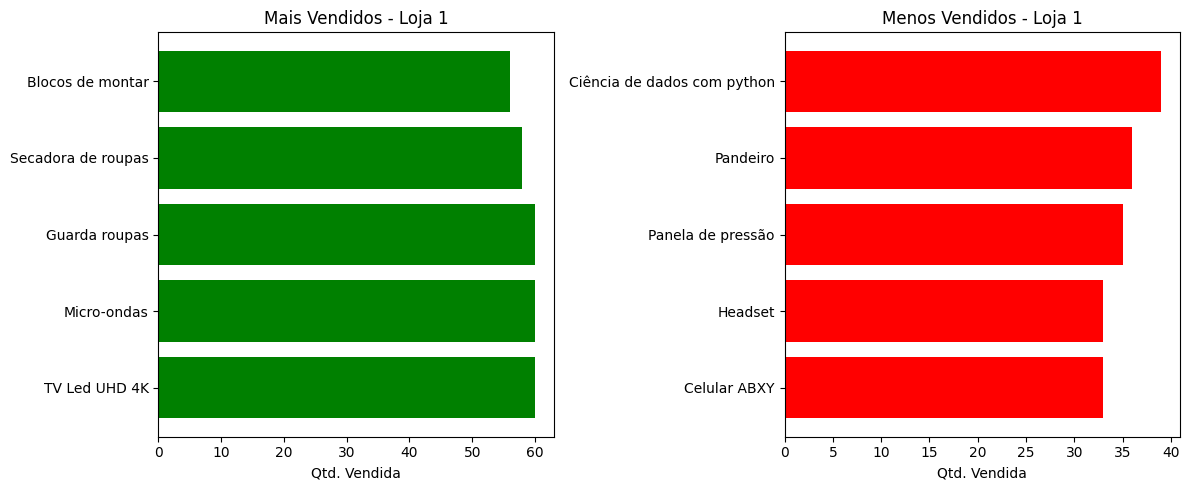

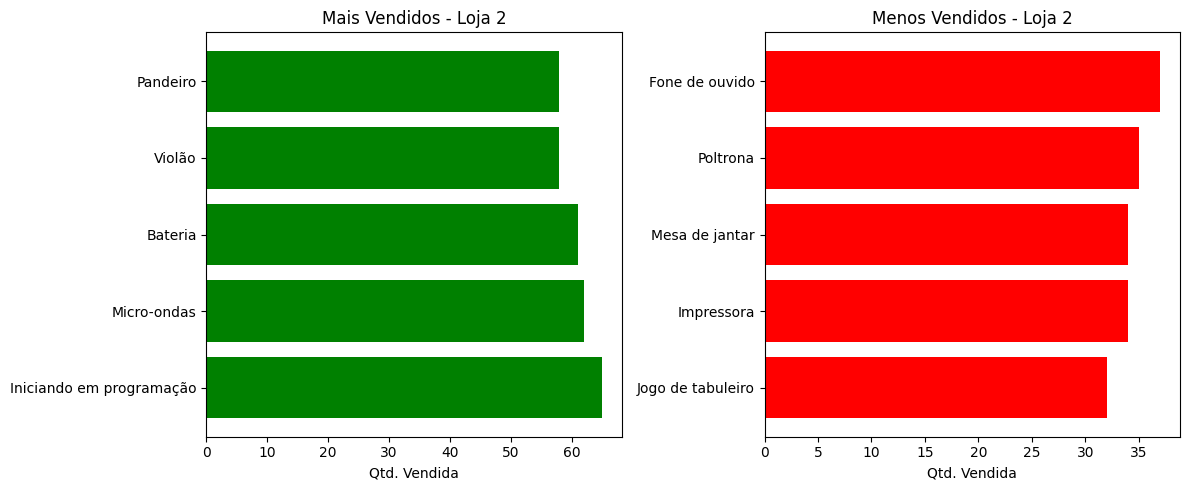

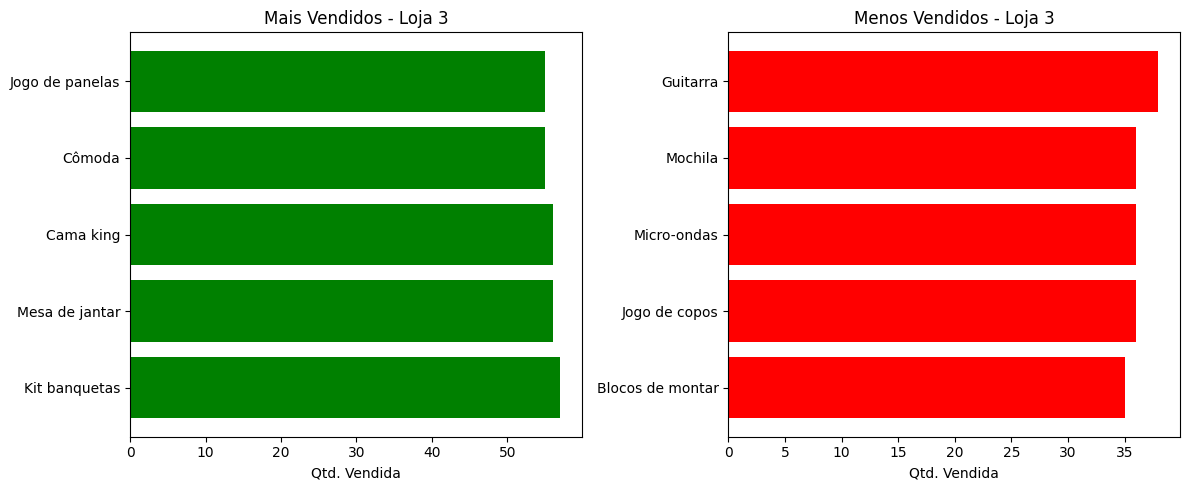

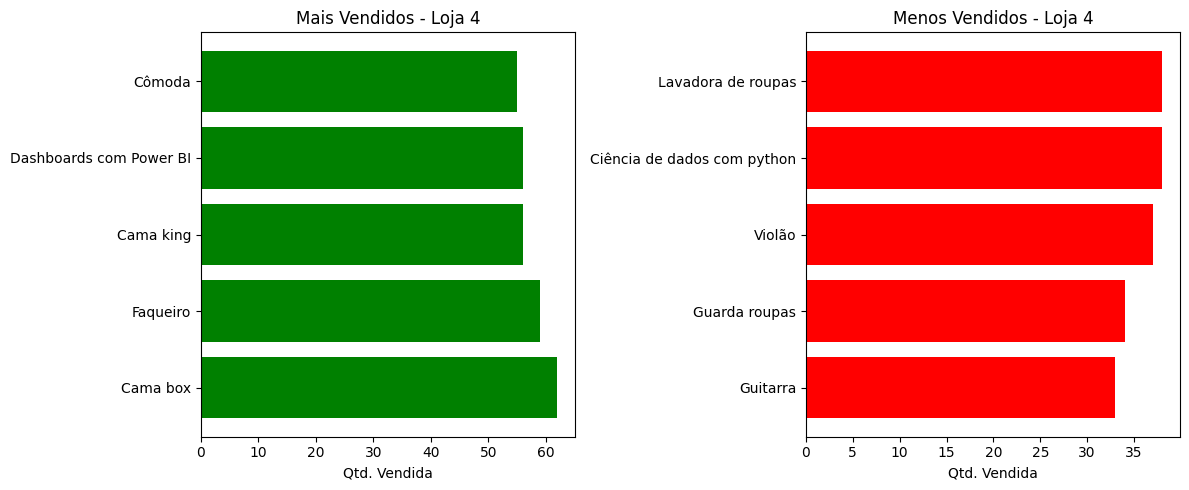

In [16]:
def plot_produtos_vendidos(df, loja_nome):
    vendas = df.groupby('Produto').size().reset_index(name='Quantidade Vendida')
    mais_vendidos = vendas.sort_values(by='Quantidade Vendida', ascending=False).head(5)
    menos_vendidos = vendas.sort_values(by='Quantidade Vendida').head(5)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.barh(mais_vendidos['Produto'], mais_vendidos['Quantidade Vendida'], color='green')
    plt.title(f'Mais Vendidos - {loja_nome}')
    plt.xlabel('Qtd. Vendida')

    plt.subplot(1, 2, 2)
    plt.barh(menos_vendidos['Produto'], menos_vendidos['Quantidade Vendida'], color='red')
    plt.title(f'Menos Vendidos - {loja_nome}')
    plt.xlabel('Qtd. Vendida')

    plt.tight_layout()
    plt.show()

for loja_nome in urls.keys():
    df_loja = df_total[df_total['Loja'] == loja_nome]
    plot_produtos_vendidos(df_loja, loja_nome)

# 5. Frete Médio por Loja


In [17]:
print("🚚 Custo Médio de Frete por Loja:")
for loja in urls.keys():
    media_frete = df_total[df_total['Loja'] == loja]['Frete'].mean()
    print(f"{loja}: R$ {media_frete:.2f}")

🚚 Custo Médio de Frete por Loja:
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


## Gerando Gráficos:

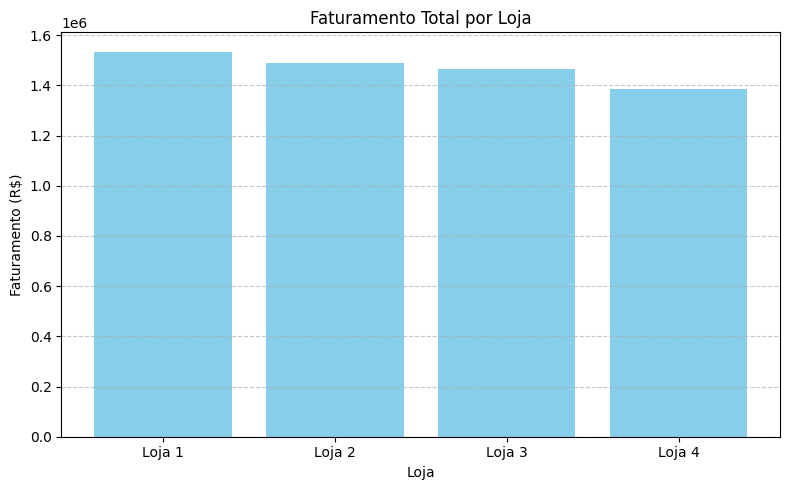

In [18]:
import matplotlib.pyplot as plt

# Faturamento por loja (sem formatação)
faturamento_bruto = df_total.groupby('Loja')['Preço'].sum().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(faturamento_bruto['Loja'], faturamento_bruto['Preço'], color='skyblue')
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

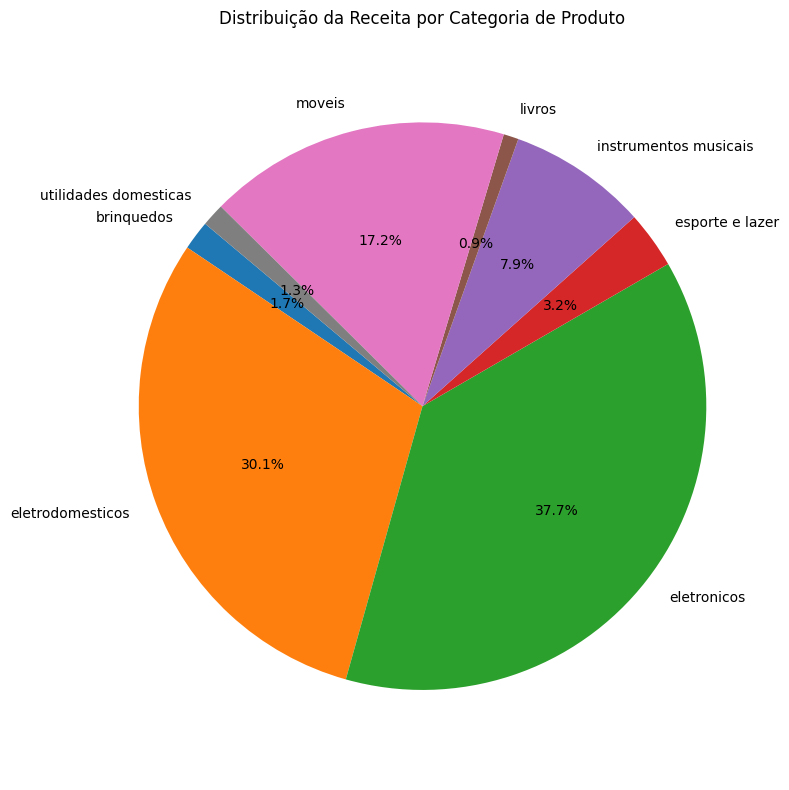

In [19]:
vendas_categoria = df_total.groupby('Categoria do Produto')['Preço'].sum()

plt.figure(figsize=(8, 8))
plt.pie(vendas_categoria, labels=vendas_categoria.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição da Receita por Categoria de Produto')
plt.axis('equal')  # Formato circular
plt.tight_layout()
plt.show()

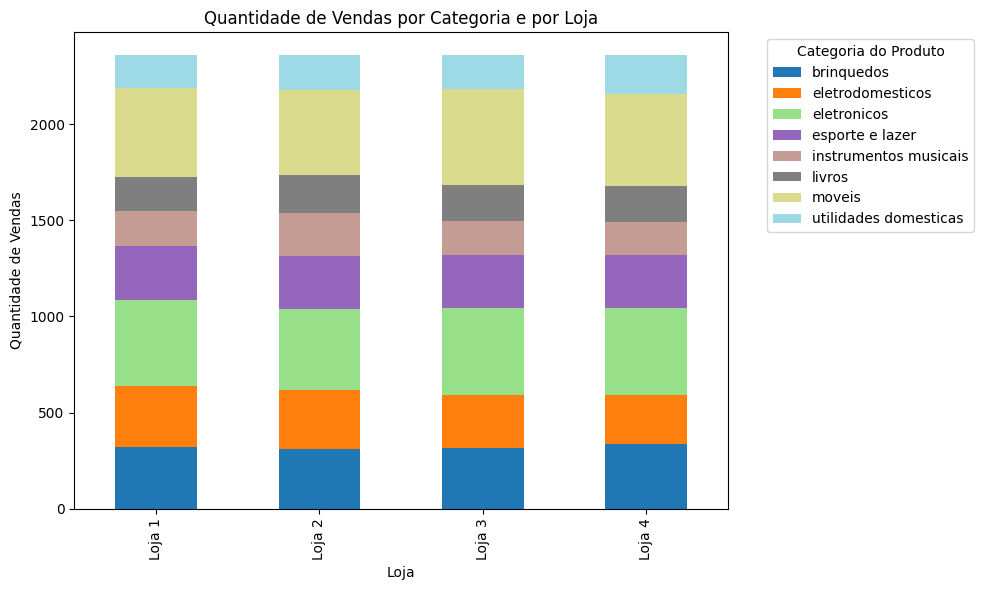

In [22]:
# Contando quantidade de vendas por loja e por categoria
vendas_categoria_loja = df_total.groupby(['Loja', 'Categoria do Produto']).size().unstack(fill_value=0)

# Plotando gráfico
vendas_categoria_loja.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Quantidade de Vendas por Categoria e por Loja')
plt.xlabel('Loja')
plt.ylabel('Quantidade de Vendas')
plt.legend(title='Categoria do Produto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 📘 Relatório Final – Recomendação de Venda da Loja

## 📌 Introdução

O objetivo desta análise é ajudar o Senhor João a decidir **qual das suas quatro lojas deve ser vendida**. Para isso, foram avaliados os seguintes aspectos:

- Faturamento total por loja
- Categorias de produtos mais e menos vendidos
- Avaliação média dos clientes
- Produtos mais e menos vendidos
- Custo médio de frete por loja

Essas análises foram apoiadas por gráficos e tabelas que permitem visualizar os principais padrões e oportunidades.

---

## 📊 Análises Realizadas

### 1. Faturamento Total por Loja

**🔍 Insight:** A Loja 1 tem o maior faturamento, e a Loja 4 o menor. A diferença entre elas é de cerca de R$ 150 mil.

---

### 2. Vendas por Categoria (Geral)


**🔍 Insight:** Eletrônicos e Eletrodomésticos lideram em receita, enquanto Móveis lidera em volume de vendas. Livros e Utilidades Domésticas têm baixa relevância.

---

### 3. Avaliação Média por Loja

| Loja | Avaliação Média |
|------|-----------------|
| Loja 3 | **4.05** |
| Loja 2 | 4.04 |
| Loja 4 | 4.00 |
| Loja 1 | 3.98 |

**🔍 Insight:** Loja 3 possui a melhor avaliação. Loja 1 tem a menor média, o que pode indicar problemas de atendimento ou produto.

---

### 4. Custo Médio de Frete

**🔍 Insight:** Loja 4 tem o menor frete médio, mas isso não se traduz em melhor desempenho geral.

---

## ✅ Conclusão e Recomendação

**🔴 Recomendação: Vender a Loja 4**

Apesar de ter o menor frete, a **Loja 4 apresenta o pior faturamento** e **não se destaca em nenhuma métrica chave**. Sua avaliação é apenas mediana e ela não lidera em nenhuma categoria de produto.

---

**💡 Considerações Finais:**

Vender a **Loja 4** permitirá ao Senhor João **focar esforços nas lojas com maior potencial de crescimento**, melhor desempenho financeiro e satisfação do cliente.




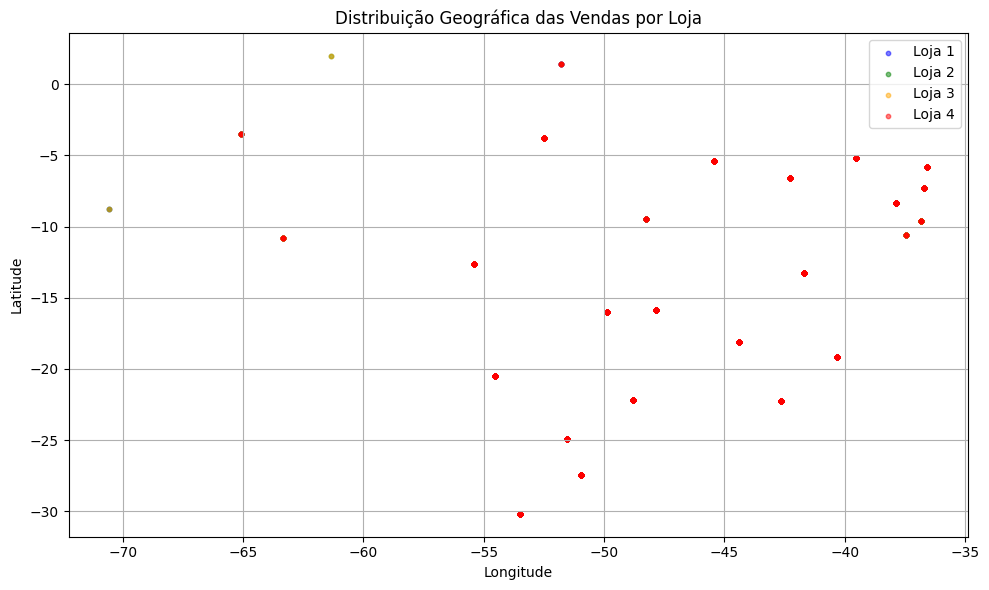

In [23]:
import matplotlib.pyplot as plt

# Paleta de cores por loja
cores_loja = {
    'Loja 1': 'blue',
    'Loja 2': 'green',
    'Loja 3': 'orange',
    'Loja 4': 'red'
}

# Plot
plt.figure(figsize=(10, 6))
for loja in df_total['Loja'].unique():
    dados_loja = df_total[df_total['Loja'] == loja]
    plt.scatter(dados_loja['lon'], dados_loja['lat'],
                label=loja, alpha=0.5, s=10, color=cores_loja[loja])

plt.title('Distribuição Geográfica das Vendas por Loja')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
!pip install folium

import folium
from folium.plugins import HeatMap

# Criando mapa base centralizado no Brasil
mapa = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Adicionando dados de calor
heat_data = [[row['lat'], row['lon']] for index, row in df_total.iterrows()]
HeatMap(heat_data, radius=8).add_to(mapa)

mapa

In [26]:
# Exemplo: Mapa de calor apenas da Loja 2
loja2_data = df_total[df_total['Loja'] == 'Loja 2']
heat_data_loja2 = [[row['lat'], row['lon']] for index, row in loja2_data.iterrows()]

mapa_loja2 = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)
HeatMap(heat_data_loja2, radius=8).add_to(mapa_loja2)
mapa_loja2